In [1]:
from ldaa import *
import matplotlib.pyplot as plt
import heapq
from generator import * 

In [2]:
generator1 = generator(10,50,np.ones(10),20)
generator2 = generator(10,50,np.ones(10)/20,80)

In [3]:
docs1 = generator1.sample(m=500)

In [4]:
model = LDA(10,50)

In [5]:
phi_post1,gamma_post1,alpha_post1,beta_post1 = model.fit(docs1)

iteration 1
finished E
-15097.134881384452
alpha:37.020458
alpha:13.854278
alpha:5.339198
alpha:2.225916
alpha:1.127427
alpha:0.808193
alpha:0.763082
alpha:0.762032
alpha:0.762032
alpha:0.762032
alpha change0.575485
beta change0.609231
finished M
iteration 2
finished E
-12830.421360804783
alpha:37.423922
alpha:14.416601
alpha:5.987461
alpha:2.973282
alpha:2.038118
alpha:1.876662
alpha:1.870840
alpha:1.870832
alpha:1.870832
alpha change1.229438
beta change0.006221
finished M
iteration 3
finished E
-12304.222378467082
alpha:37.852888
alpha:15.022142
alpha:6.705833
alpha:3.838164
alpha:3.090981
alpha:3.015375
alpha:3.014530
alpha:3.014530
alpha:3.014530
alpha change1.308045
beta change0.000782
finished M
iteration 4
finished E
-12077.264624485153
alpha:38.289783
alpha:15.646602
alpha:7.465245
alpha:4.774322
alpha:4.196896
alpha:4.161743
alpha:4.161606
alpha:4.161606
alpha change1.315784
beta change0.000121
finished M
iteration 5
finished E
-11951.571690728604
alpha:38.731282
alpha:16.2851

In [6]:
model.alpha

0.25983313823440335

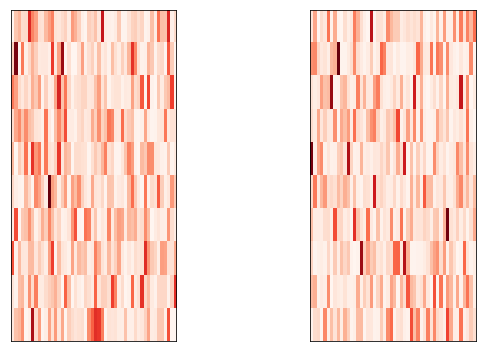

In [7]:
B1 = np.repeat(generator1.beta, 10, axis=0)
B2 = np.repeat(beta_post1, 10, axis=0)
B = [B1,B2] 
fig, axes = plt.subplots(1, 2, figsize=(10,5), sharey=True)
for i, ax in enumerate(axes.ravel(), 1):
    ax.imshow(B[i-1],cmap='Reds')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
plt.tight_layout()


In [13]:
generator2 = generator(10,500,np.ones(10)/20,80)
_=generator2.make_parameter()
docs2 = generator2.sample(m=1000)

In [14]:
train = np.array([doc.sum(axis=0) for doc in docs2])

In [15]:
from sklearn.decomposition import LatentDirichletAllocation


In [16]:
lda = LatentDirichletAllocation(n_topics=10,
                                learning_offset=50.,
                                random_state=0)

In [17]:
lda2 = LatentDirichletAllocation(n_topics=10,
                                learning_offset=50.,
                                random_state=2)

In [19]:
lda2.fit(train)

c:\users\xas_x\appdata\local\programs\python\python37\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=10, perp_tol=0.1,
             random_state=2, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [18]:
%%time
lda.fit(train)

c:\users\xas_x\appdata\local\programs\python\python37\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Wall time: 8.96 s


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=10, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

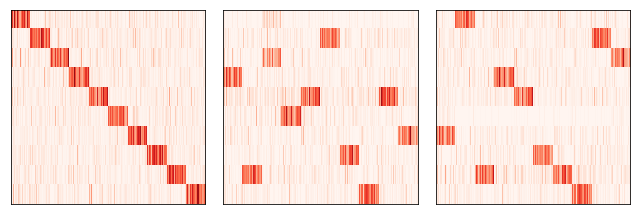

In [21]:
B1 = np.repeat(generator2.beta, 50, axis=0)
B2 = np.repeat(lda.components_, 50, axis=0)
B3 = np.repeat(lda2.components_, 50, axis = 0)
B = [B1,B2,B3] 
fig, axes = plt.subplots(1, 3, figsize=(9,9), sharey=True)
for i, ax in enumerate(axes.ravel(), 1):
    ax.imshow(B[i-1],cmap='Reds')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
plt.tight_layout()

In [3]:
model2 = LDA(10,500)

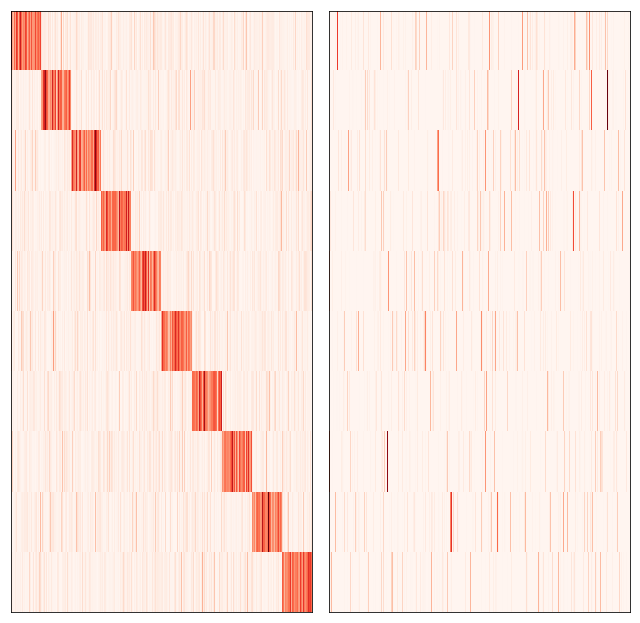

In [4]:
B1 = np.repeat(generator2.beta, 100, axis=0)
B2 = np.repeat(model2.beta, 100, axis=0)
B = [B1,B2] 
fig, axes = plt.subplots(1, 2, figsize=(9,9), sharey=True)
for i, ax in enumerate(axes.ravel(), 1):
    ax.imshow(B[i-1],cmap='Reds')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
plt.tight_layout()

In [5]:
phi_post2,gamma_post2,alpha_post2,beta_post2 = model2.fit(docs2,max_iter=100)

iteration 1
finished E
-24087.21666620795
alpha:38.387064
alpha:15.786668
alpha:7.637841
alpha:4.988673
alpha:4.444784
alpha:4.415081
alpha:4.414989
alpha:4.414989
alpha change19.141697
beta change0.098316
finished M
iteration 2
finished E
-23565.76350587113
alpha:39.997215
alpha:18.154180
alpha:10.645250
alpha:8.707945
alpha:8.515969
alpha:8.513908
alpha:8.513908
alpha:8.513908
alpha change16.801142
beta change0.000124
finished M
iteration 3
finished E
-23393.831338239
alpha:41.590850
alpha:20.575830
alpha:13.816352
alpha:12.477053
alpha:12.409637
alpha:12.409460
alpha:12.409460
alpha change15.175322
beta change0.000031
finished M
iteration 4
finished E
-23307.616074881334
alpha:43.181680
alpha:23.053599
alpha:17.077268
alpha:16.176078
alpha:16.151972
alpha:16.151954
alpha:16.151954
alpha change14.006263
beta change0.000008


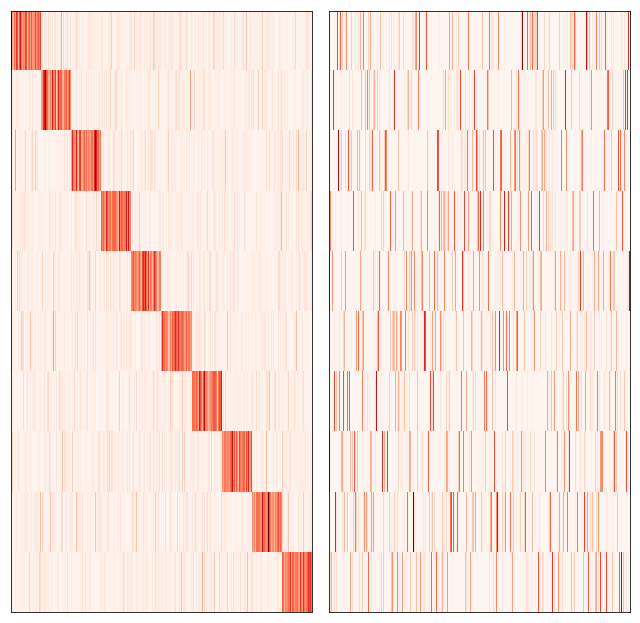

In [7]:
B1 = np.repeat(generator2.beta, 100, axis=0)
B2 = np.repeat(beta_post2, 100, axis=0)
B = [B1,B2] 
fig, axes = plt.subplots(1, 2, figsize=(9,9), sharey=True)
for i, ax in enumerate(axes.ravel(), 1):
    ax.imshow(B[i-1],cmap='Reds')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
plt.tight_layout()

In [6]:
beta_post2.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [7]:
beta_post2

array([[0.00185105, 0.00200202, 0.00185004, ..., 0.00106247, 0.00204844,
        0.00229445],
       [0.00188692, 0.00141463, 0.00230333, ..., 0.00178663, 0.00190343,
        0.00232113],
       [0.00163817, 0.00113505, 0.00160631, ..., 0.00315789, 0.00194008,
        0.00171548],
       ...,
       [0.00244741, 0.00173769, 0.00174291, ..., 0.00154993, 0.00248566,
        0.00166885],
       [0.00148364, 0.00235451, 0.00223575, ..., 0.0035682 , 0.00215999,
        0.00301455],
       [0.00211598, 0.00183298, 0.00291746, ..., 0.00230782, 0.00287564,
        0.00390208]])

| Algorithm|variational EM|variational Bayes|
|-|-|-|
|time|32s|1.7s|